# 587 - Concave Triangle

## Problem Statement

<p>
A square is drawn around a circle as shown in the diagram below on the left.

We shall call the blue shaded region the L-section.

A line is drawn from the bottom left of the square to the top right as shown in the diagram on the right.

We shall call the orange shaded region a <dfn>concave triangle</dfn>.
</p>
<div class="center">
<img src="images/0587_concave_triangle_1.png" class="dark_img" alt="0587_concave_triangle_1.png">
</div>
<p>
It should be clear that the concave triangle occupies exactly half of the L-section.
</p>
<p>

Two circles are placed next to each other horizontally, a rectangle is drawn around both circles, and a line is drawn from the bottom left to the top right as shown in the diagram below.
</p>
<div class="center">
<img src="images/0587_concave_triangle_2.png" class="dark_img" alt="0587_concave_triangle_2.png">
</div>
<p>
This time the concave triangle occupies approximately 36.46% of the L-section.
</p>

If $n$ circles are placed next to each other horizontally, a rectangle is drawn around the <var>n</var> circles, and a line is drawn from the bottom left to the top right, then it can be shown that the least value of <var>n</var> for which the concave triangle occupies less than 10% of the L-section is $n = 15$.


What is the least value of $n$ for which the concave triangle occupies less than 0.1% of the L-section?

## Solution

Let's assume that the leftmost circle has radius 1 and is centred at $(0, 0)$. The equation of the circle is $x^2 + y^2 = 1$. The equation of the diagonal line is given by $y = \frac{1}{n}x - \frac{n - 1}{n}$.

To find the intersection point, we start by substituting $y$ from the line equation into the circle equation to get

\begin{align}
    1 &= \left ( \frac{1}{n}x - \frac{n - 1}{n}  \right )^2 + x^2 \\
    &= \frac{1}{n^2}x^2 - \frac{2(n - 1)}{n^2}x + \frac{(n - 1)^2}{n^2} + x^2.
\end{align}

Simplifying further, we obtain

\begin{equation}
    (n^2 + 1)x^2 - 2(n - 1)x + (n - 1)^2 - n^2 = 0.
\end{equation}

We can now solve for $x$ using the quadratic formula and get $y$ by substituting $x$ into the line equation. We obtain

\begin{align}
    x_1 &= \frac{n - 1 - \sqrt{2}\sqrt{n^3}}{n^2 + 1}, \\
    y_1 &= \frac{-n^3 + n^2 - \sqrt{2}\sqrt{n^3}}{n^3 + n}.
\end{align}

Note that we are only interested in the leftmost intersection so we only keep the solution with a negative sign.

Now that we have the intersection point, we need to compute the area. We can split the area into two parts. The left part is the right triangle below the line and the right part is below the circle. Let their respective area be $A_L$ and $A_R$.

Computing $A_L$ is straightforward as it is simply the area of a triangle. Remembering that the leftmost vertex of the triangle is located at $(-1, -1)$ and that $-1 \leq x_1, y_1 \leq 0$, the area is given by be given by

\begin{equation}
    \frac{(1 + x_1)(1 + y_1)}{2}.
\end{equation}

To compute $A_R$, we will integrate. The area, $A_c$, below the top part of the circle between $x = x_1$ to $x = 0$ is given by

\begin{align}
    A_c &= \int_{x_1}^0 \sqrt{1 - x^2} + 1 \,\, dx \\
        &= -\frac{x_1\sqrt{1 - x_1^2}}{2} - x1 - \frac{\arcsin (x_1)}{2}.
\end{align}

Note that this is the area below the top part of the circle. To obtain the area we are interested in, we need to subtract $A_c$ from $2|x_1|$ (See the visualisation at the bottom). Therefore we have 


\begin{equation}
    A_L = 2|x_1| - A_c
\end{equation}

The last missing piece is the total area at the bottom left of the circle. It is given by $1 - \frac{\pi}{4}$.

Now, we simply try every possibility for $n$ (the number of circles) until the sum of $A_L$ and $A_R$ represents less than 0.1% of $1 - \frac{\pi}{4}$.


In [1]:
import numpy as np

def get_intersection_coordinates(n):
    x = (n - np.sqrt(2) * np.sqrt(n**3) - 1) / (n**2 + 1)
    y = (-n**3 + n**2 - np.sqrt(2) * np.sqrt(n**3)) / (n**3 + n)
    return x, y

def calculate_area(x, y):
    if x < -1 or x > 0:
        raise ValueError("The value of x must be between -1 and 0.")
    left_area = 1/2 * (1 + x) * (1 + y)
    right_area = 2 * abs(x) - (-x * np.sqrt(1 - x**2) / 2 - x - np.arcsin(x) / 2)
    return left_area + right_area

denominator = 1 - np.pi / 4
n = 1
while True:
    coordinates = get_intersection_coordinates(n)
    area = calculate_area(coordinates[0], coordinates[1])
    if area / denominator < 0.001:
        break
    n += 1

print(f'The answer is {n}.')

The answer is 2240.


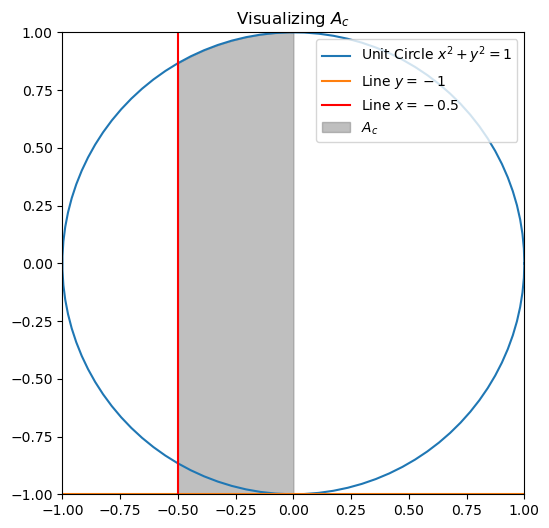

In [2]:
import matplotlib.pyplot as plt

# Circle definition
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

# Line y = -1
x_line = np.linspace(-1.5, 1.5, 100)
y_line = -np.ones_like(x_line)

# Define c
c = -0.5

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x_circle, y_circle, label='Unit Circle $x^2 + y^2 = 1$')
ax.plot(x_line, y_line, label='Line $y = -1$')
ax.axvline(x=c, color='red', label=f'Line $x = {c}$')

# Shading the area of interest
x_fill = np.linspace(c, 0, 100)
y_fill = np.sqrt(1 - x_fill**2)
ax.fill_between(x_fill, y_fill, -1, color='gray', alpha=0.5, label=r'$A_c$')

# Setting the limits and labels
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal', 'box')
ax.legend(loc='upper right')
ax.set_title(r'Visualizing $A_c$')

plt.show()
